In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
cwd = os.getcwd()
cancel = pd.read_csv(cwd + '/cancel.csv')

In [4]:
# get yearly flight info
infile = open('yearly_flights.pickle', 'rb')
yearly = pickle.load(infile)
infile.close()

In [5]:
yearly

{'Total Flights': 6951793,
 'Months': {'January Flights': 570118,
  'February Flights': 520731,
  'March Flights': 611987,
  'April Flights': 596046,
  'May Flights': 616529,
  'June Flights': 626193,
  'July Flights': 645299,
  'August Flights': 644673,
  'September Flights': 585749,
  'October Flights': 616101,
  'November Flights': 454162,
  'December Flights': 464205},
 'Seasons': {'Spring Flights': 1866428,
  'Summer Flights': 1910847,
  'Fall Flights': 1545252,
  'Winter Flights': 1629266},
 'Airlines': {'Endeavor Air': 205728,
  'American Airlines': 909554,
  'Alaska Airlines': 234333,
  'JetBlue': 303722,
  'Delta Airlines': 945194,
  'ExpressJet': 216089,
  'Frontier Airlines': 118871,
  'Allegiant Air': 80908,
  'Hawaiian Airlines': 82904,
  'Envoy Air': 245812,
  'Spirit Airlines': 172771,
  'PSA Airlines': 232630,
  'SkyWest Airlines': 767028,
  'United Airlines': 615683,
  'Virgin American': 30111,
  'SouthWest Airlines': 1347369,
  'Mesa Airlines': 178097,
  'Republic Air

## Monthly 

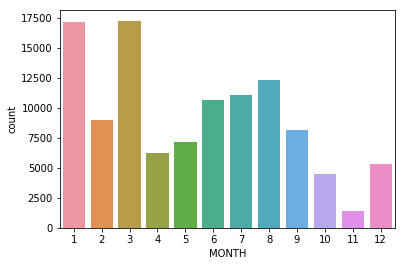

In [23]:
sns.countplot(cancel['MONTH'])

In [7]:
# charting how many cancelations for each month
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

month_ct = cancel['MONTH'].value_counts()
freq = [month_ct[x] for x in range(1,13)]

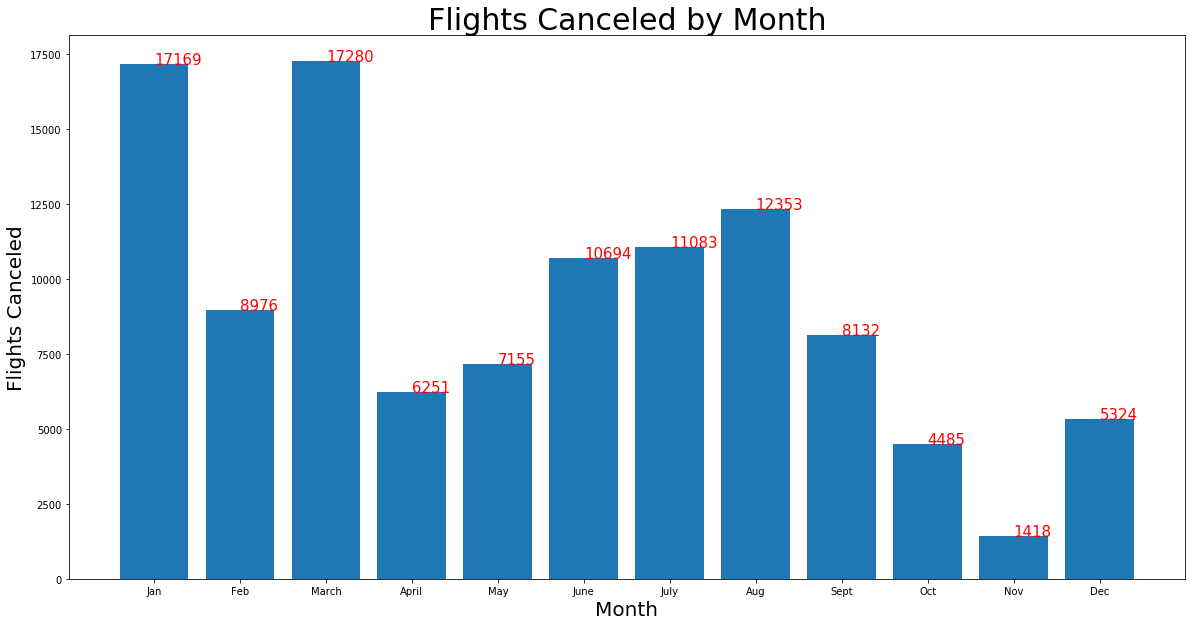

In [8]:
plt.figure(figsize=(20,10))
plt.bar(month, freq)
plt.title("Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(month, freq):
    plt.text(a, b, str(b), fontsize =15, color ='r')
plt.show()

### % of flights cancled per month

In [9]:
m = yearly['Months']
f = list(m.values())
m_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(f)):
    m_pct.append(round((freq[x]/f[x]) * 100,2))

# for x in range(len(f)):
#     print(str(round((freq[x]/f[x]) * 100,2)) + "%" )

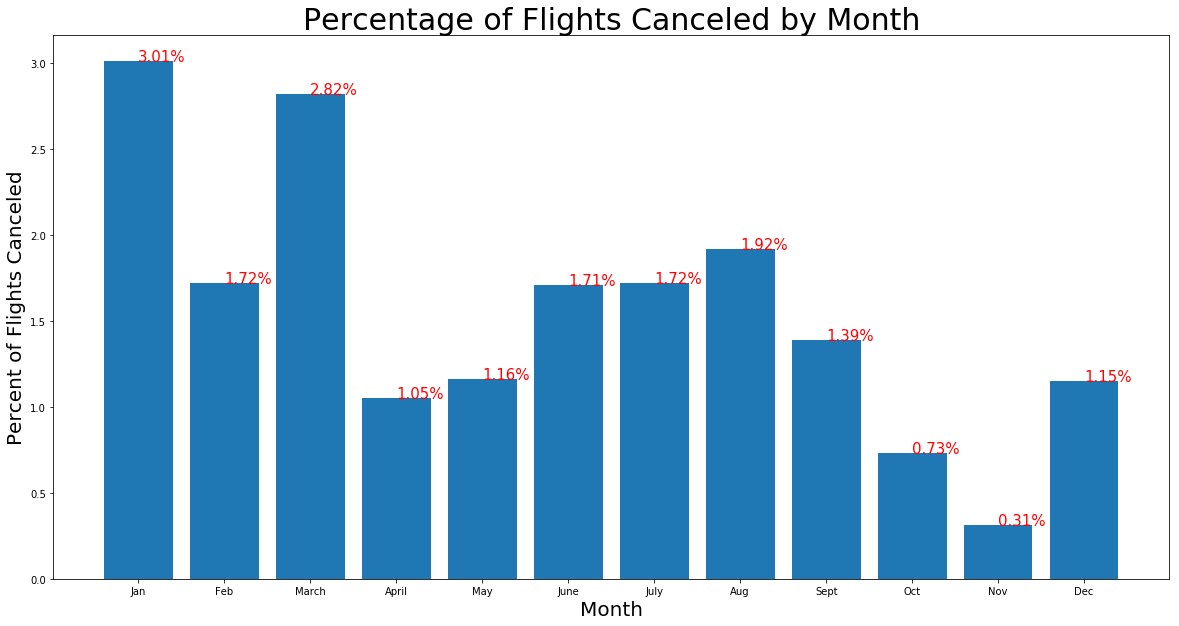

In [10]:
plt.figure(figsize=(20,10))
plt.bar(month, m_pct)
plt.title("Percentage of Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Percent of Flights Canceled', fontsize =20)
for a,b in zip(month, m_pct):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

In [11]:
m_pct

[3.01, 1.72, 2.82, 1.05, 1.16, 1.71, 1.72, 1.92, 1.39, 0.73, 0.31, 1.15]

## Seasonal 

In [65]:
cancel['FL_DATE'] = pd.to_datetime(cancel['FL_DATE'])
winter_start = '12-21-2017'
winter_end = '03-19-2018'
maskw = (cancel['FL_DATE'] >= winter_start) & (cancel['FL_DATE'] <= winter_end)
winter = cancel.loc[maskw]

spring_start = '03-20-2018'
spring_end = '06-20-2018'
masksp = (cancel['FL_DATE'] >= spring_start) & (cancel['FL_DATE'] <= spring_end)
spring = cancel.loc[masksp]

summer_start = '06-21-2018'
summer_end = '09-21-2018'
masksum = (cancel['FL_DATE'] >= summer_start) & (cancel['FL_DATE'] <= summer_end)
summer = cancel.loc[masksum]

fall_start = '11-01-2017'
fall_end = '12-20-2017'
aut_start = '09-22-2018'
aut_end = '10-31-2018'
maskf = (cancel['FL_DATE'] >= fall_start) & (cancel['FL_DATE'] <= fall_end)
maska = (cancel['FL_DATE'] >= aut_start) & (cancel['FL_DATE'] <= aut_end)
fall = cancel.loc[maskf]
aut = cancel.loc[maska]
fall = fall.append([aut])

In [66]:
season = ['Fall', "Winter", "Spring", "Summer"]
amt = [len(fall), len(winter), len(spring), len(summer)]

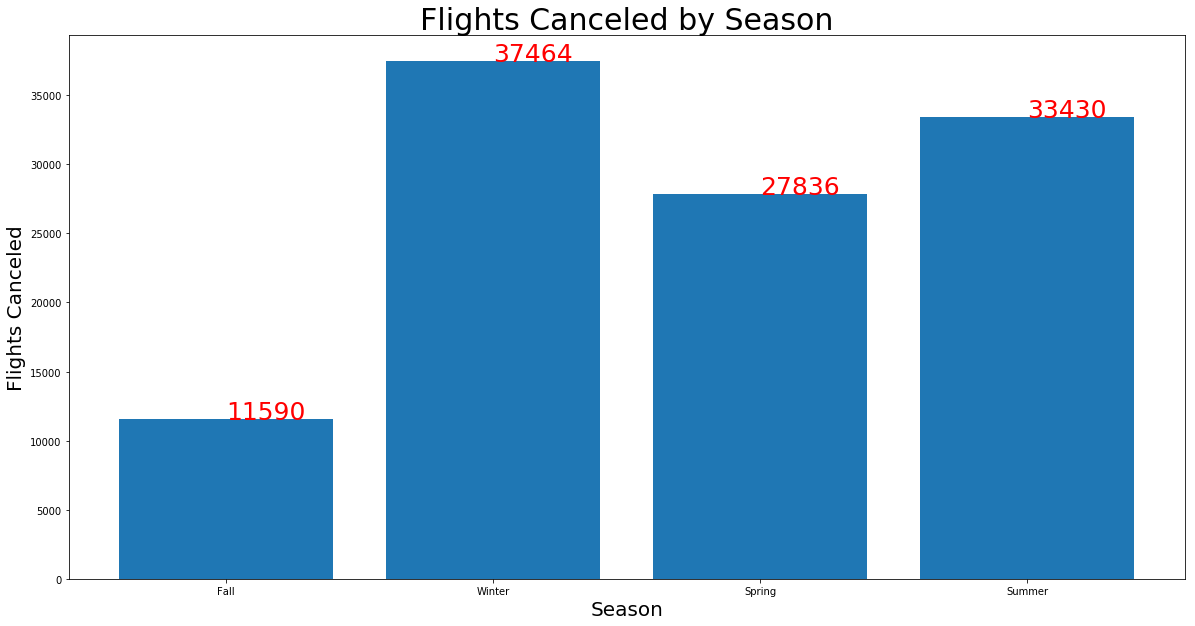

In [77]:
plt.figure(figsize=(20,10))
plt.bar(season, amt)
plt.title("Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(season, amt):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

## Airline

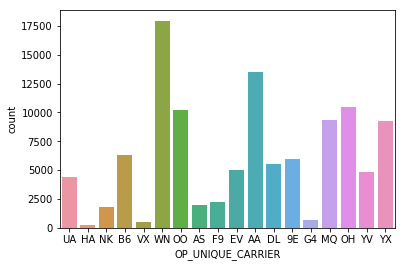

In [24]:
sns.countplot(cancel['OP_UNIQUE_CARRIER'])

"AS","ALASKA AIRLINES"
"B6","JETBLUE AIRLINES"
"DL","DELTA AIRLINES"
“EV”,“EXPRESSJET AIRLINES” 
"F9","FRONTIER AIRLINES"
"G4","ALLEGIANT AIR"
"HA","HAWAIIAN AIRLINES"
“MQ”,”ENVOY AIR”
"NK","SPIRIT AIRLINES"
“OH”,”PSA AIRLINES
“OO”,”SKYWEST AIRLINES”
"UA","UNITED AIRLINES"
"VX”,”VIRGIN AMERICA"
"WN","SOUTHWEST AIRLINES"
“YV”,”MESA AIRLINES”
“YX”,”REPUBLIC AIRLINE”
“9E”,”ENDEAVOR AIR”

## Airports

AttributeError: 'AxesSubplot' object has no attribute 'fig'

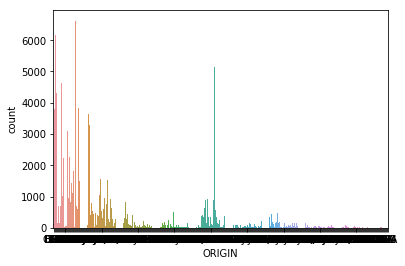

In [29]:
f = sns.countplot(cancel['ORIGIN'])
f.fig.set_size_inches(15,15)